In [24]:
from dag_cld import env
from dag_cld import ast
from dag_cld import mask

logger = env.Logger(blabla=False)
ima = ast.Image(logger)
fts = ast.Fits(logger)
p_mask = mask.Polar(logger)
g_mask = mask.Geometric(logger)
h_mask = mask.HexagonSlicer(logger)

In [19]:
number_of_samples = 500
mask_coordinates = {"E": ((20, 70), (45, 135)), "S": ((20, 70), (135, 225)),
                    "W": ((20, 70), (225, 315)), "N": ((20, 70), (315, 405)),
                    "ZE": ((70, 90), (45, 135)), "ZS": ((70, 90), (135, 225)),
                    "ZW": ((70, 90), (225, 315)), "ZN": ((70, 90), (315, 405))}

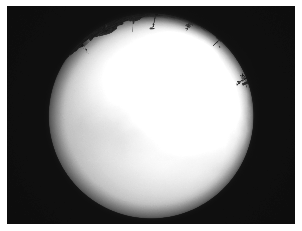

In [20]:
data = fts.data("data/cloud/2017_07_05__08_38_50.fits.gz")
gray = ima.rgb2gray(ima.array2rgb(data))
ima.show(gray)

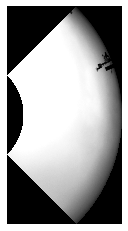

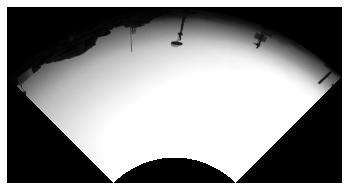

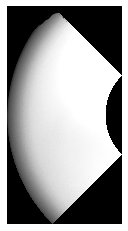

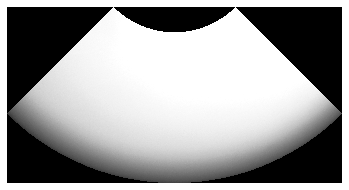

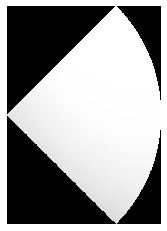

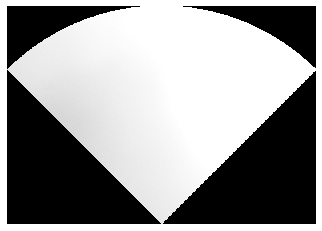

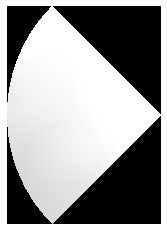

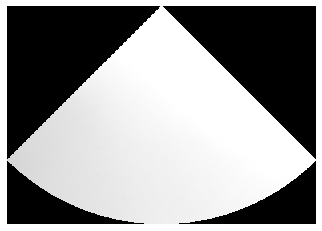

In [21]:
for direction, coordinates in mask_coordinates.items():
    the_mask = p_mask.altaz(gray.shape, coordinates[0], coordinates[1], rev=True)
    masked_data = p_mask.apply(gray, the_mask)
    windowed_data = ima.find_window(masked_data)
    ima.show(windowed_data)

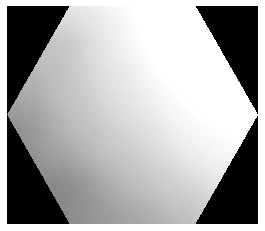

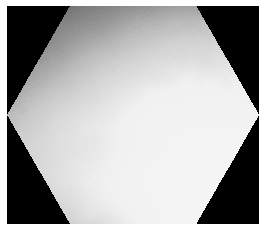

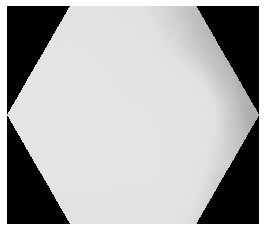

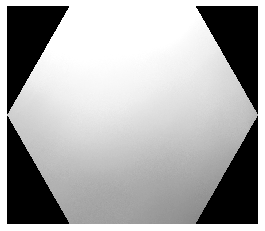

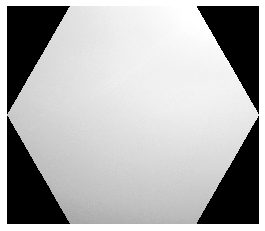

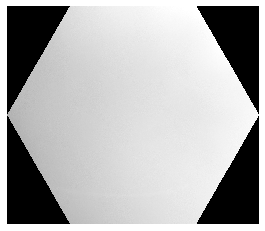

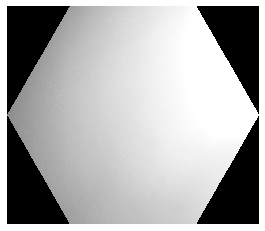

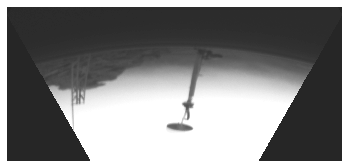

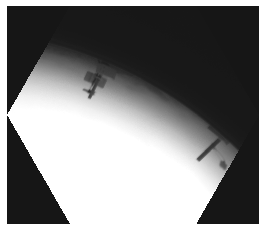

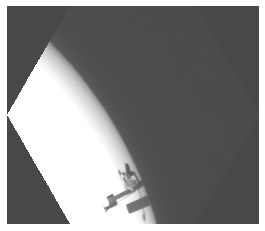

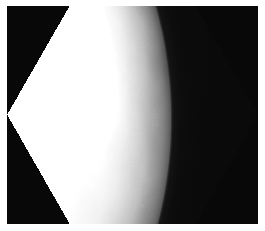

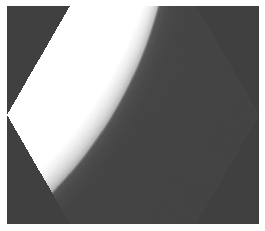

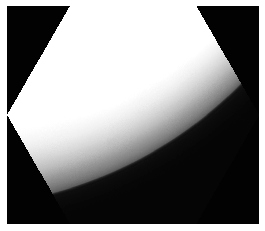

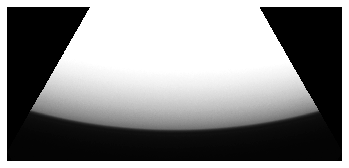

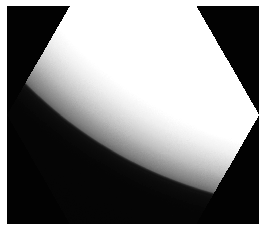

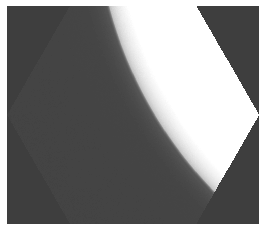

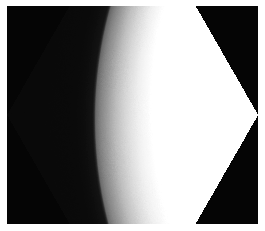

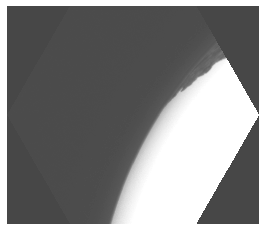

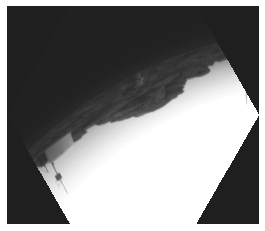

In [22]:
for points in h_mask.fill_center(gray.shape, hex_radius=500):
    the_mask = g_mask.polygon(gray.shape, points, rev=True)
    masked_data = p_mask.apply(gray, the_mask)
    windowed_data = ima.find_window(masked_data)
    ima.show(windowed_data)